In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Windows 10 Pro\Desktop\dataset (2)\Resume\Resume.csv")

In [3]:
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [5]:
df.shape

(2484, 4)

In [6]:
df["Category"].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [7]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [8]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_828/1852079727.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


<Figure size 864x432 with 0 Axes>

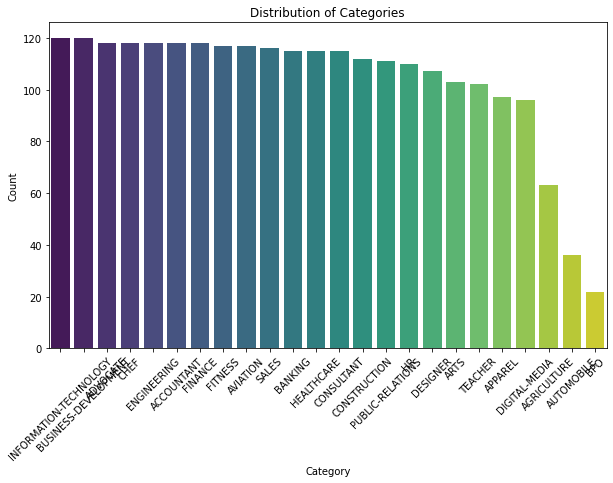

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts=df["Category"].value_counts()

plt.figure(figsize=(12,6))
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

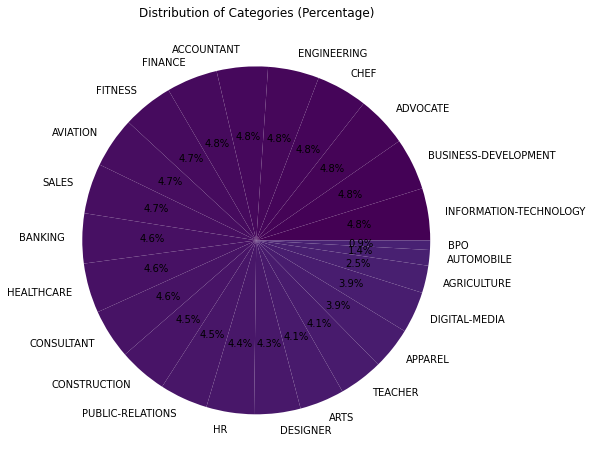

In [10]:
category_percentages = df["Category"].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 8))
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', colors=plt.cm.viridis(range(len(category_percentages))))
plt.title("Distribution of Categories (Percentage)")
plt.show()

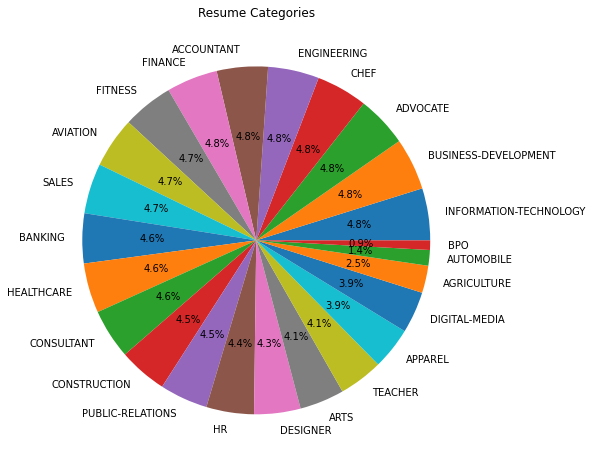

In [11]:
import matplotlib.pyplot as plt

counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Resume Categories")
plt.show()


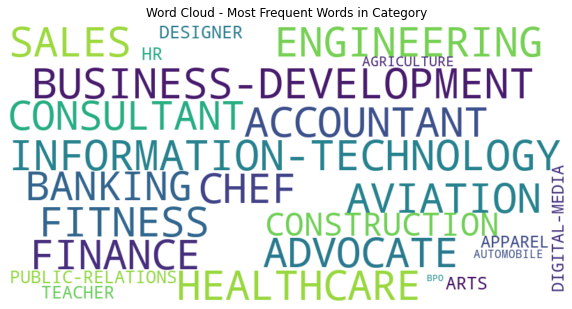

In [12]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join(df['Category'])

word_counts = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Category')
plt.show()


In [13]:
print(df["Resume_str"][1])

         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.         Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully re-br

<h1> Data Cleaning Process as learn from "Natural Language Processing with Classification and Vector Spaces"

In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def data_cleaning(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text



[nltk_data] Downloading package stopwords to C:\Users\Windows 10
[nltk_data]     Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Windows 10
[nltk_data]     Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:

df['Cleaned_Resume']=df['Resume_str'].apply(lambda x:data_cleaning(x))


In [16]:
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  \
0  <div class="fontsize fontface vmargins hmargin...       HR   
1  <div class="fontsize fontface vmargins hmargin...       HR   
2  <div class="fontsize fontface vmargins hmargin...       HR   
3  <div class="fontsize fontface vmargins hmargin...       HR   
4  <div class="fontsize fontface vmargins hmargin...       HR   

                                      Cleaned_Resume  
0  hr administratormarketing associate hr adminis...  
1  hr specialist us hr operations summary versati...  
2  hr director summary years experience recruitin...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlights hr skills hr depar...

In [17]:
empty_rows = df[df['Cleaned_Resume'] == '']
print(empty_rows)


           ID             Resume_str  \
656  12632728                          

                                           Resume_html              Category  \
656  <div class="fontsize fontface vmargins hmargin...  BUSINESS-DEVELOPMENT   

    Cleaned_Resume  
656                 


In [18]:
df=df.drop(["Resume_str","Resume_html"],axis=1)
df=df.drop(empty_rows.index)

In [19]:
df.Cleaned_Resume[1]

'hr specialist us hr operations summary versatile media professional background communications marketing human resources technology experience current hr specialist us hr operations company name city state managed communication regarding launch operations group policy changes system outages designed standard work job aids create comprehensive training program new employees contractors audited job postings old pending onhold draft positions audited union hourly nonunion hourly salary background checks drug screens conducted monthly new hire benefits briefing new employees across business units served link hr managers vendors handling questions resolving systemrelated issues provide realtime process improvement feedback key metrics initiatives successfully rebranded us hr operations sharepoint site business unit project manager rfirfp background check drug screen vendor marketing communications coop company name city state posted new articles changes updates corporate sharepoint site inc

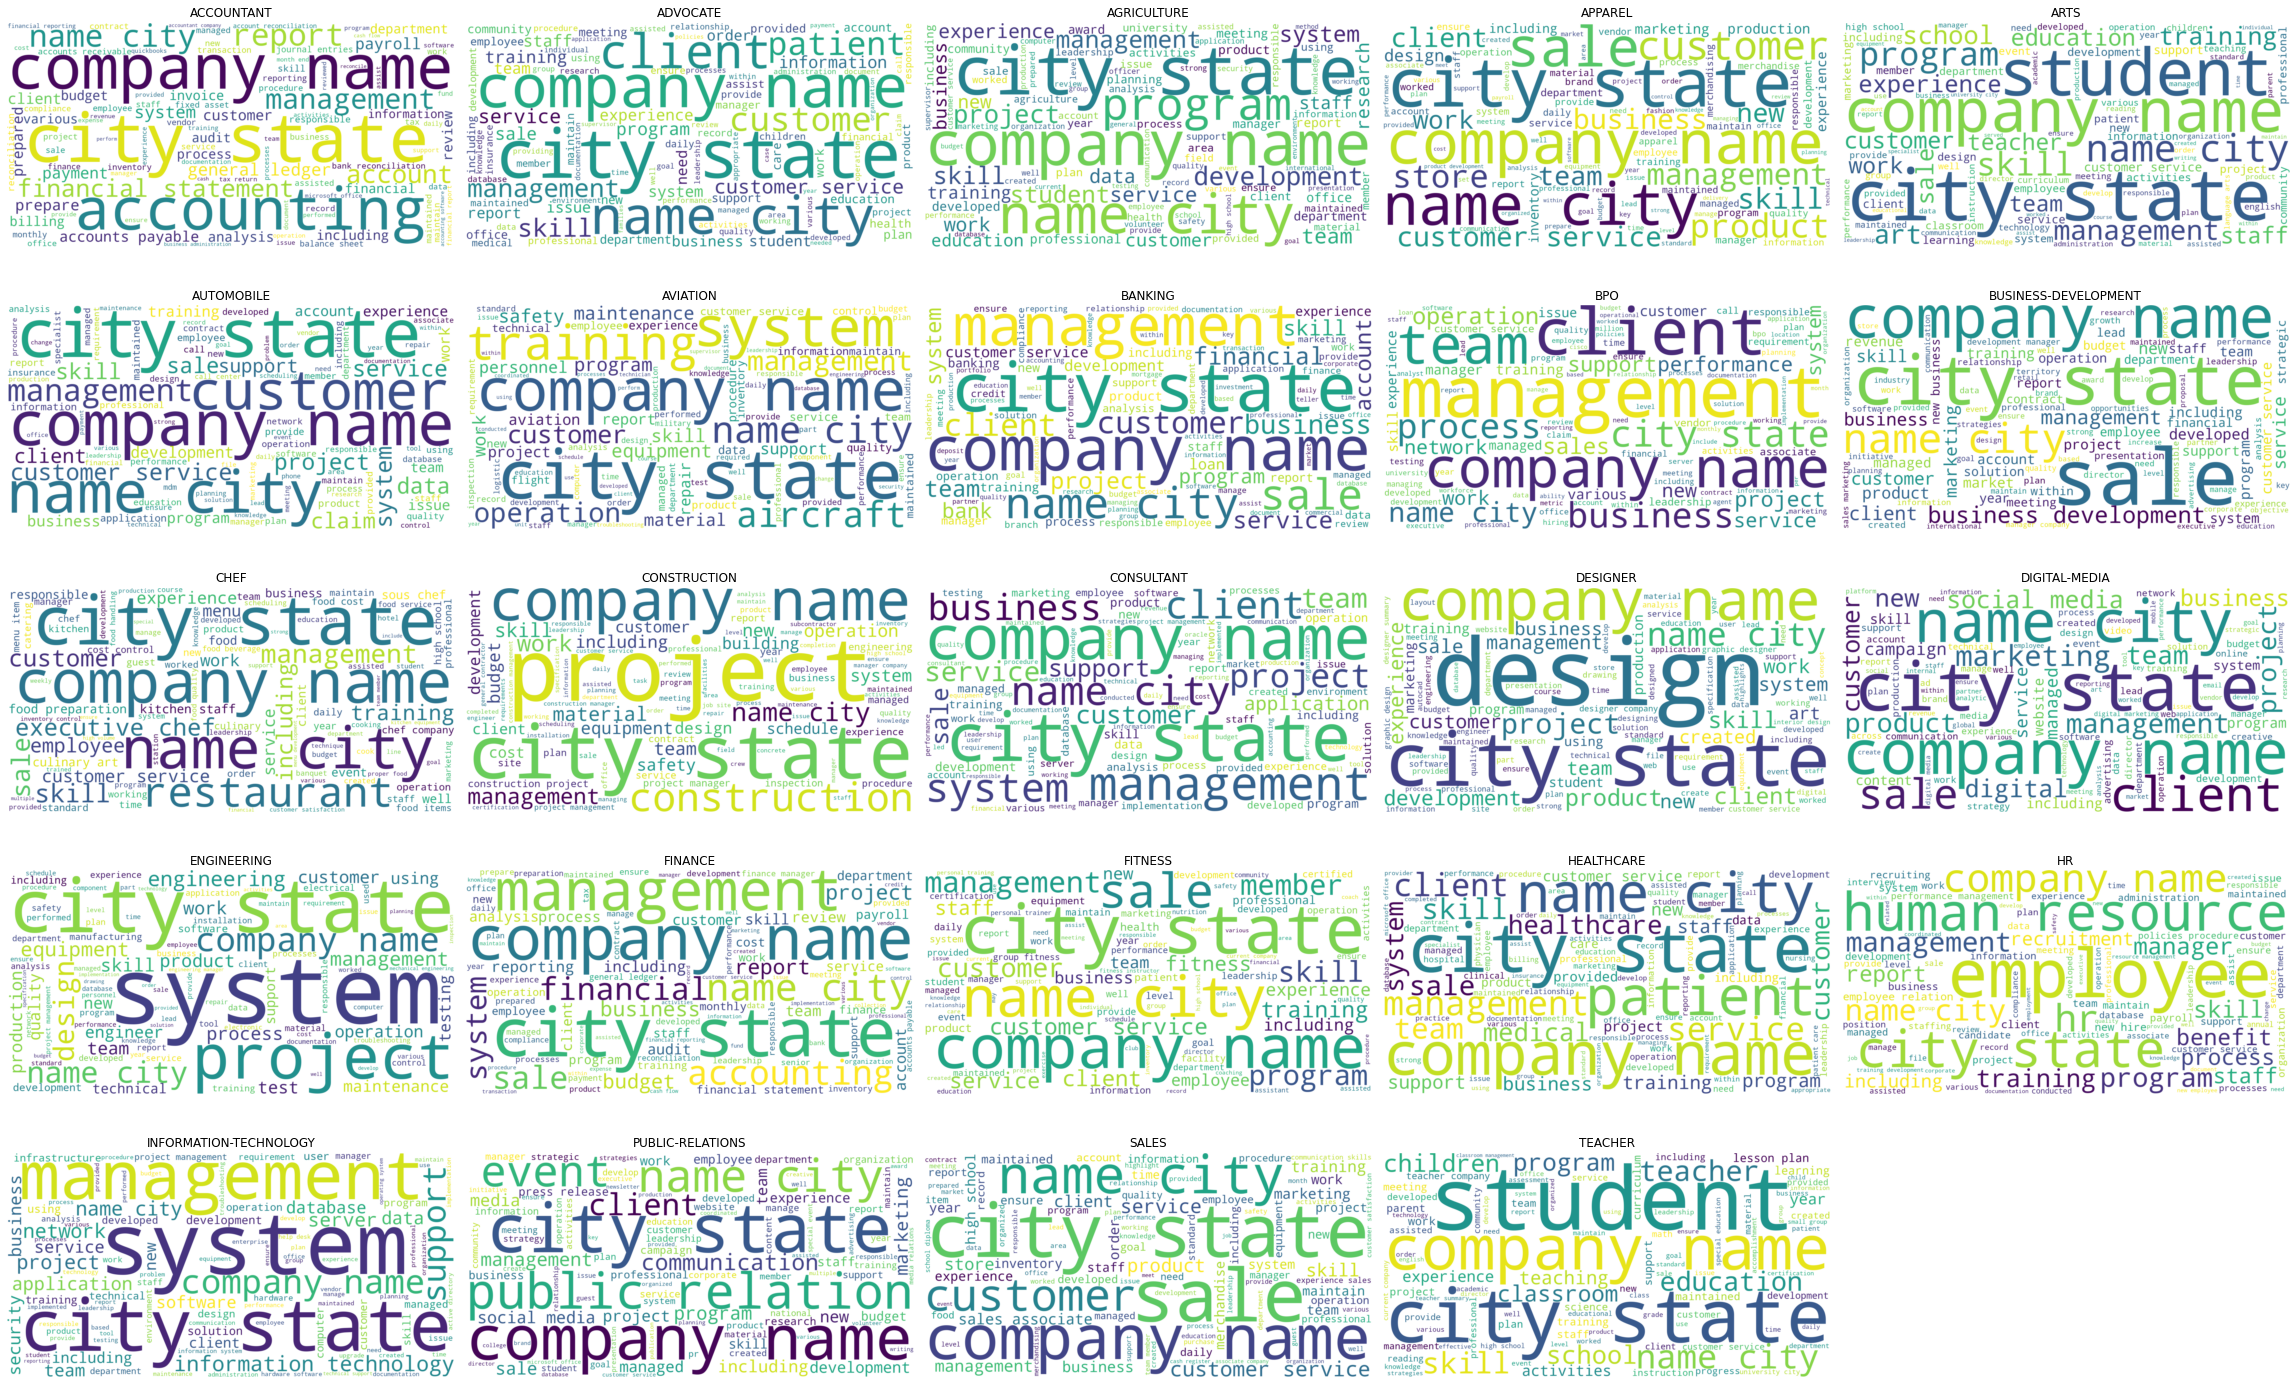

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import gc

categories = np.sort(df['Category'].unique())

df_categories = [
    ' '.join(df[df['Category'] == category]['Cleaned_Resume'].astype(str))
    for category in categories
]

def generate_wordcloud(text, height=1000, width=2000, max_words=100):
    wc = WordCloud(
        height=height,
        width=width,
        max_words=max_words,
        background_color='white'
    ).generate(text)
    return wc

plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = generate_wordcloud(df_categories[i])
    
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    del wc
    gc.collect()

plt.tight_layout()
plt.show()
plt.close()




In [21]:
def remove_extra_word(text):
    extra_word = ['compani', 'name', 'citi', 'state', 'work', 'manag']
    words = text.split()
    filter_word = [word for word in words if word not in extra_word]
    filter_text = ' '.join(filter_word)
    return filter_text
df['Cleaned_Resume'] = df['Cleaned_Resume'].apply(remove_extra_word)


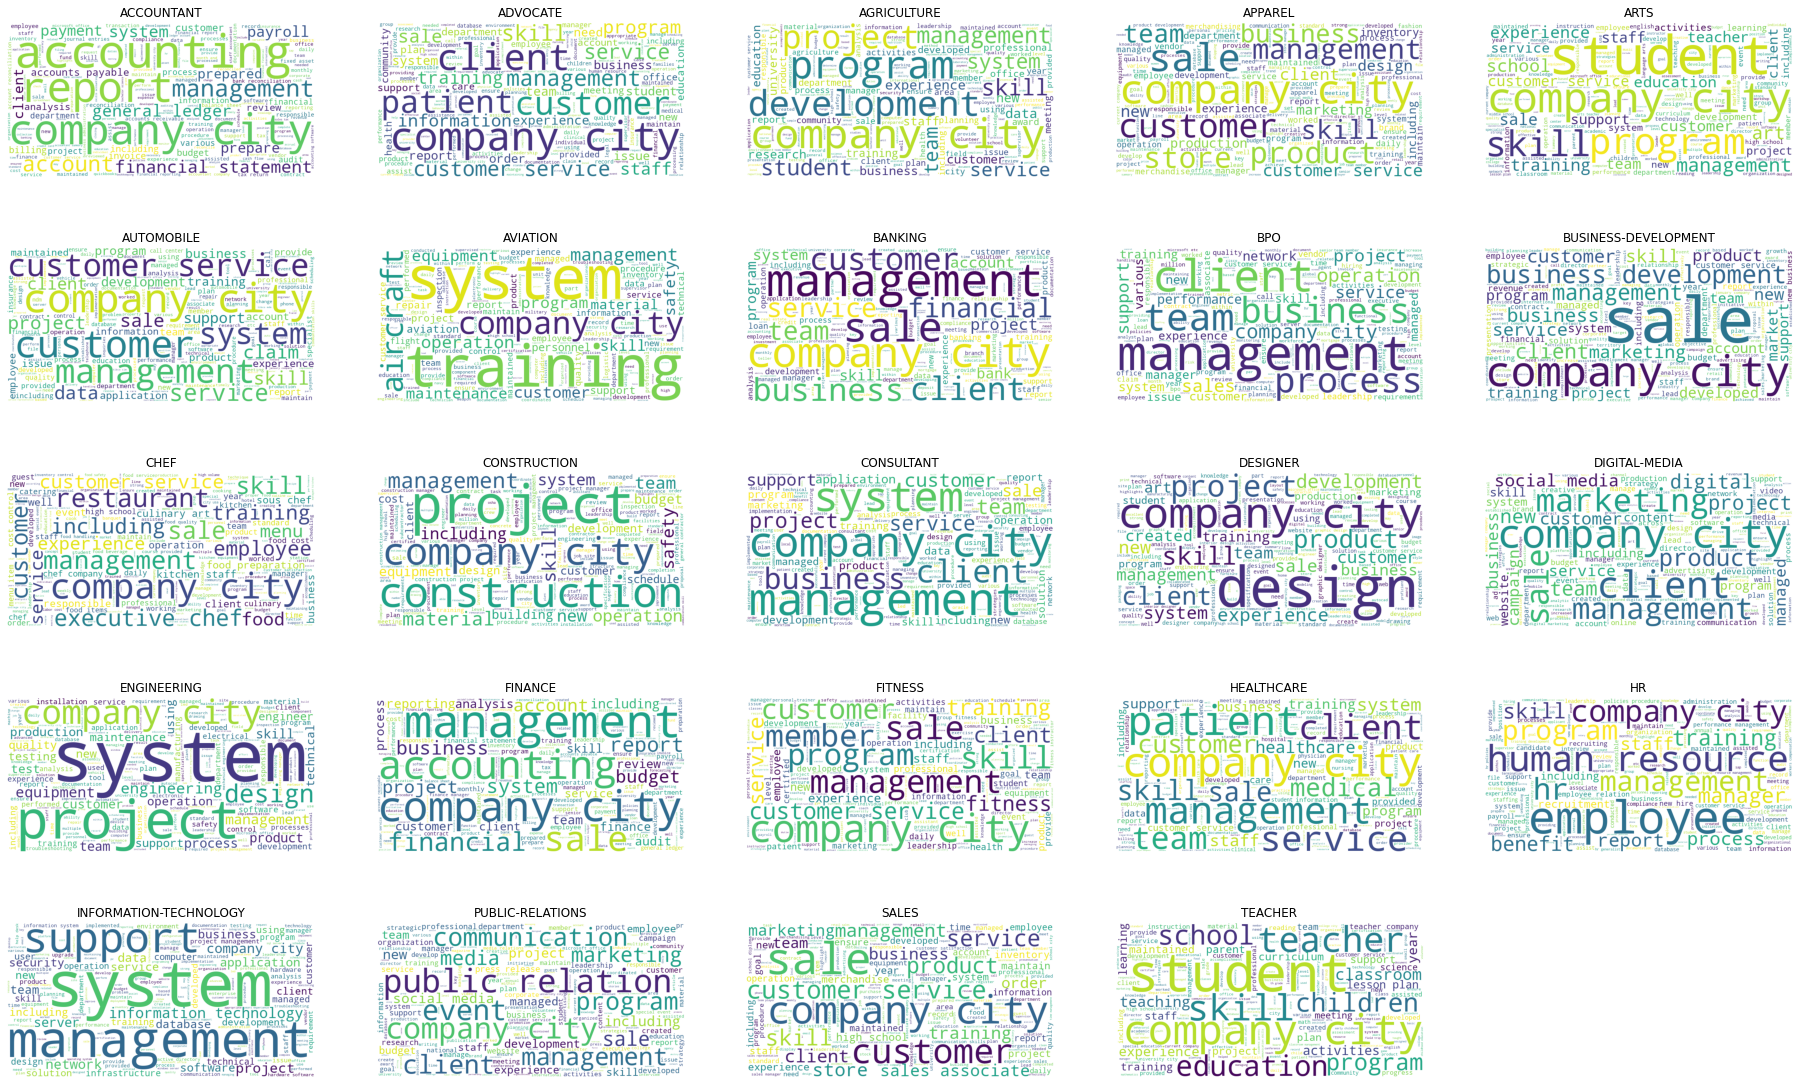

In [22]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['Category'] == category]['Cleaned_Resume']))
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')

plt.show()
plt.close()

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [24]:
df['Category']=encoder.fit_transform(df['Category'])

In [25]:
df.head()

ID  Category                                     Cleaned_Resume
0  16852973        19  hr administratormarketing associate hr adminis...
1  22323967        19  hr specialist us hr operations summary versati...
2  33176873        19  hr director summary years experience recruitin...
3  27018550        19  hr specialist summary dedicated driven dynamic...
4  17812897        19  hr manager skill highlights hr skills hr depar...

In [26]:
df.Category.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

<H1>Split dataset into Training and Validation

In [27]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, stratify=df['Category'], random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Category'], random_state=42)

print(f"Training set size: {train_data.shape[0]} samples")
print(f"Validation set size: {validation_data.shape[0]} samples")
print(f"Test set size: {test_data.shape[0]} samples")
train_data.to_csv('train_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


Training set size: 1738 samples
Validation set size: 372 samples
Test set size: 373 samples


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=800)
tfidf_train_vectors = tfidf.fit_transform(train_data['Cleaned_Resume'])
tfidf_test_vectors = tfidf.transform(test_data['Cleaned_Resume'])
tfidf_valid_vectors = tfidf.transform(validation_data['Cleaned_Resume'])



In [29]:
tfidf_train_vectors.shape

(1738, 800)

In [42]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("TfidfVectorizer has been saved to 'tfidf_vectorizer.pkl'.")

TfidfVectorizer has been saved to 'tfidf_vectorizer.pkl'.


In [30]:
vocabulary = tfidf.vocabulary_
print("Vocabulary:")
print(vocabulary)

Vocabulary:
{'sales': np.int64(659), 'summary': np.int64(721), 'focused': np.int64(310), 'dedicated': np.int64(206), 'insurance': np.int64(382), 'professional': np.int64(575), 'motivated': np.int64(476), 'provide': np.int64(592), 'customer': np.int64(196), 'service': np.int64(676), 'drive': np.int64(239), 'strategic': np.int64(710), 'marketing': np.int64(449), 'activities': np.int64(19), 'highlights': np.int64(345), 'phone': np.int64(532), 'manner': np.int64(445), 'property': np.int64(589), 'products': np.int64(574), 'exceptional': np.int64(278), 'interpersonal': np.int64(389), 'skills': np.int64(686), 'excellent': np.int64(277), 'communication': np.int64(141), 'strong': np.int64(713), 'accomplishments': np.int64(4), 'consistently': np.int64(162), 'items': np.int64(396), 'goals': np.int64(324), 'experience': np.int64(285), 'company': np.int64(145), 'city': np.int64(117), 'months': np.int64(475), 'time': np.int64(744), 'generated': np.int64(321), 'new': np.int64(485), 'weekly': np.int64

In [31]:
tfidf.get_feature_names_out()

array(['ability', 'able', 'academic', 'access', 'accomplishments',
       'accordance', 'according', 'account', 'accountant', 'accounting',
       'accounts', 'accuracy', 'accurate', 'accurately', 'achieve',
       'achieved', 'achievement', 'action', 'active', 'activities',
       'activity', 'ad', 'additional', 'administration', 'administrative',
       'administrator', 'adobe', 'advanced', 'advertising',
       'affiliations', 'agencies', 'agency', 'aid', 'air', 'aircraft',
       'american', 'analysis', 'analyst', 'analytical', 'analytics',
       'analyze', 'analyzed', 'andor', 'annual', 'application',
       'applications', 'applied', 'appropriate', 'april', 'area', 'areas',
       'art', 'arts', 'aspects', 'assessment', 'assessments', 'assets',
       'assigned', 'assist', 'assistance', 'assistant', 'assisted',
       'assisting', 'associate', 'associates', 'association', 'assurance',
       'attention', 'audit', 'audits', 'august', 'aviation', 'award',
       'awards', 'awarene

<h1>Apply classification Model based on Previous Research
<h2>Paper Link: https://www.itm-conferences.org/articles/itmconf/pdf/2022/04/itmconf_icacc2022_03011.pdf

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


y_train = train_data['Category']
y_valid = validation_data['Category']
y_test = test_data['Category']


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train_vectors, y_train)
y_valid_pred = rf_classifier.predict(tfidf_valid_vectors)
y_test_pred = rf_classifier.predict(tfidf_test_vectors)

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation Classification Report:")
print(classification_report(y_valid, y_valid_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.6424731182795699
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        17
           1       0.27      0.18      0.21        17
           2       1.00      0.10      0.18        10
           3       0.44      0.27      0.33        15
           4       0.33      0.12      0.18        16
           5       0.00      0.00      0.00         6
           6       0.80      0.71      0.75        17
           7       0.83      0.59      0.69        17
           8       0.00      0.00      0.00         4
           9       0.57      0.67      0.62        18
          10       0.80      0.71      0.75        17
          11       0.89      0.94      0.91        17
          12       0.67      0.59      0.62        17
          13       0.79      0.94      0.86        16
          14       0.67      0.53      0.59        15
          15       0.70      0.82      0.76        17
       

c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y_train = train_data['Category']
y_valid = validation_data['Category']
y_test = test_data['Category']

best_params = {
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(tfidf_train_vectors, y_train)

y_valid_pred = rf_classifier.predict(tfidf_valid_vectors)
y_test_pred = rf_classifier.predict(tfidf_test_vectors)

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation Classification Report:")
print(classification_report(y_valid, y_valid_pred))

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.6397849462365591
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        17
           1       0.29      0.24      0.26        17
           2       0.50      0.10      0.17        10
           3       0.33      0.27      0.30        15
           4       0.40      0.12      0.19        16
           5       0.00      0.00      0.00         6
           6       0.92      0.71      0.80        17
           7       0.83      0.59      0.69        17
           8       0.00      0.00      0.00         4
           9       0.53      0.56      0.54        18
          10       0.92      0.71      0.80        17
          11       0.94      0.94      0.94        17
          12       0.56      0.59      0.57        17
          13       0.82      0.88      0.85        16
          14       0.64      0.60      0.62        15
          15       0.72      0.76      0.74        17
       

c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [41]:
import pickle
with open('rf_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)